In [40]:
with open("cycling.txt",'r+') as file:
    data=file.readlines()
    
    a=data[1:]


In [41]:
a[0:5]

['"Tadej Pogačar" "All Rounder" "X1" 15 "flat"\n',
 '"Tadej Pogačar" "All Rounder" "X2" 219 "hills"\n',
 '"Tadej Pogačar" "All Rounder" "X3" 34 "flat"\n',
 '"Tadej Pogačar" "All Rounder" "X4" 264 "hills"\n',
 '"Tadej Pogačar" "All Rounder" "X6" 114 "hills"\n']

In [42]:
p=a[0].strip().split('" ')
p

['"Tadej Pogačar', '"All Rounder', '"X1', '15 "flat"']

In [43]:
p[0].replace('"','')

'Tadej Pogačar'

In [44]:
p[1].replace('"','')

'All Rounder'

In [45]:
p[2].replace('"','')

'X1'

In [46]:
p[3]

'15 "flat"'

In [47]:
p[-1].split(" ")[1].strip('"')

'flat'

In [48]:
p[-1].split(" ")[0]

'15'

In [49]:
z=[]

In [50]:
"all_riders" "rider_class" "stage" "points" "stage_class"

'all_ridersrider_classstagepointsstage_class'

In [51]:
import pandas as pd

In [52]:
for i in a:
    j=i.strip().split('" ')
    dit={}
    dit["all_riders"]=j[0].replace('"','')
    dit["rider_class"]=j[1].replace('"','')
    dit["stage"]=j[2].replace('"','')
    dit["points"]=j[-1].split(" ")[0]
    dit["stage_class"]=j[-1].split(" ")[1].strip('"')
    z.append(dit)

In [54]:
z[0]

{'all_riders': 'Tadej Pogačar',
 'rider_class': 'All Rounder',
 'stage': 'X1',
 'points': '15',
 'stage_class': 'flat'}

In [55]:
import pandas as pd


In [56]:
df=pd.DataFrame(z)

In [57]:
df.head()

,all_riders,rider_class,stage,points,stage_class
0,Tadej Pogačar,All Rounder,X1,15,flat
1,Tadej Pogačar,All Rounder,X2,219,hills
2,Tadej Pogačar,All Rounder,X3,34,flat
3,Tadej Pogačar,All Rounder,X4,264,hills
4,Tadej Pogačar,All Rounder,X6,114,hills


### EVERY GROUP FROM X1 TO X12 WHO IS BETTER 
### INDIVIDUAL KONSE GROUP MEH AACHA KRA AUR KONSA ARENA
### BEST PLAYER FROM EACH CATEGORY
### WHO TO SELECT AS PER ROUND AND ARENA
### CUMMULATIVE POINTs and average 


In [58]:
df['points'] = df['points'].astype(int)

In [59]:
best_per_stage = (
    df.sort_values('points', ascending=False)
      .groupby('stage')
      .first()
      .reset_index()
)

print(best_per_stage[['stage', 'all_riders', 'points']])


   stage              all_riders  points
0     X1        Jasper Philipsen     272
1    X10             Simon Yates     248
2    X11        Jonas Abrahamsen     260
3    X12           Tadej Pogačar     304
4    X14         Thymen Arensman     292
5    X15             Tim Wellens     252
6    X16  Valentin Paret-Peintre     251
7    X17          Jonathan Milan     238
8    X18           Tadej Pogačar     284
9    X19         Thymen Arensman     263
10    X2    Mathieu Van Der Poel     258
11   X20            Kaden Groves     244
12   X21           Wout Van Aert     232
13    X3             Tim Merlier     226
14    X4           Tadej Pogačar     264
15    X6               Ben Healy     264
16    X7           Tadej Pogačar     274
17    X8          Jonathan Milan     252
18    X9             Tim Merlier     234


In [60]:
arena_performance = (
    df.groupby(['all_riders', 'stage_class'])['points']
      .mean()
      .reset_index()
)

print(arena_performance)


           all_riders stage_class     points
0          Adam Yates        flat   8.666667
1          Adam Yates       hills  12.250000
2          Adam Yates       mount  41.200000
3     Alberto Dainese        flat  46.333333
4     Alberto Dainese       hills   5.500000
..                ...         ...        ...
547   Xandro Meurisse       hills   9.000000
548   Xandro Meurisse       mount   7.000000
549  Yevgeniy Fedorov        flat  16.666667
550  Yevgeniy Fedorov       hills   5.000000
551  Yevgeniy Fedorov       mount   0.000000

[552 rows x 3 columns]


In [61]:
best_by_class = (
    df.groupby(['rider_class', 'all_riders'])['points']
      .sum()
      .reset_index()
      .sort_values(['rider_class', 'points'], ascending=[True, False])
)

best_by_class = best_by_class.groupby('rider_class').first().reset_index()
print(best_by_class)


   rider_class            all_riders  points
0  All Rounder         Tadej Pogačar    2789
1      Climber           Oscar Onley    1308
2     Sprinter        Jonathan Milan    1203
3    Unclassed  Mathieu Van Der Poel    1022


In [62]:
best_stage_arena = (
    df.sort_values('points', ascending=False)
      .groupby(['stage', 'stage_class'])
      .first()
      .reset_index()
)

print(best_stage_arena[['stage', 'stage_class', 'all_riders', 'points']])


   stage stage_class              all_riders  points
0     X1        flat        Jasper Philipsen     272
1    X10       hills             Simon Yates     248
2    X11       hills        Jonas Abrahamsen     260
3    X12       mount           Tadej Pogačar     304
4    X14       mount         Thymen Arensman     292
5    X15       hills             Tim Wellens     252
6    X16       mount  Valentin Paret-Peintre     251
7    X17        flat          Jonathan Milan     238
8    X18       mount           Tadej Pogačar     284
9    X19       mount         Thymen Arensman     263
10    X2       hills    Mathieu Van Der Poel     258
11   X20       hills            Kaden Groves     244
12   X21        flat           Wout Van Aert     232
13    X3        flat             Tim Merlier     226
14    X4       hills           Tadej Pogačar     264
15    X6       hills               Ben Healy     264
16    X7       hills           Tadej Pogačar     274
17    X8        flat          Jonathan Milan  

In [63]:
cumulative = (
    df.groupby('all_riders')['points']
      .sum()
      .reset_index(name='total_points')
)

print(cumulative)


           all_riders  total_points
0          Adam Yates           356
1     Alberto Dainese           322
2    Aleksandr Vlasov           166
3       Alex Aranburu            58
4         Alex Baudin           118
..                ...           ...
179    Warren Barguil            24
180        Will Barta           131
181     Wout Van Aert           925
182   Xandro Meurisse           137
183  Yevgeniy Fedorov           140

[184 rows x 2 columns]


In [64]:
summary = (
    df.groupby('all_riders')
      .agg(
          total_points=('points', 'sum'),
          avg_points=('points', 'mean'),
          max_points=('points', 'max'),
          stages_played=('stage', 'count')
      )
      .reset_index()
)

print(summary)


           all_riders  total_points  avg_points  max_points  stages_played
0          Adam Yates           356   18.736842          99             19
1     Alberto Dainese           322   16.947368         110             19
2    Aleksandr Vlasov           166    8.736842         114             19
3       Alex Aranburu            58    3.052632          30             19
4         Alex Baudin           118    6.210526          35             19
..                ...           ...         ...         ...            ...
179    Warren Barguil            24    1.263158          16             19
180        Will Barta           131    6.894737         130             19
181     Wout Van Aert           925   48.684211         232             19
182   Xandro Meurisse           137    7.210526          35             19
183  Yevgeniy Fedorov           140    7.368421          80             19

[184 rows x 5 columns]


In [65]:
import pandas as pd

df = pd.DataFrame(z)
df['points'] = df['points'].astype(int)
df['stage_num'] = df['stage'].str.replace('X','').astype(int)


In [66]:
df

,all_riders,rider_class,stage,points,stage_class,stage_num
0,Tadej Pogačar,All Rounder,X1,15,flat,1
1,Tadej Pogačar,All Rounder,X2,219,hills,2
2,Tadej Pogačar,All Rounder,X3,34,flat,3
3,Tadej Pogačar,All Rounder,X4,264,hills,4
4,Tadej Pogačar,All Rounder,X6,114,hills,6
...,...,...,...,...,...,...
3491,Fabian Lienhard,Unclassed,X17,0,flat,17
3492,Fabian Lienhard,Unclassed,X18,0,mount,18
3493,Fabian Lienhard,Unclassed,X19,0,mount,19
3494,Fabian Lienhard,Unclassed,X20,0,hills,20


In [67]:
K = 5   # change to 3 if needed

top_riders = (
    df.groupby('all_riders')['points']
      .sum()
      .sort_values(ascending=False)
      .head(K)
      .index
)

df_top = df[df['all_riders'].isin(top_riders)]


In [68]:
final_ranking = (
    df_top
    .groupby('all_riders')['points']
    .sum()
    .sort_values(ascending=False)
    .reset_index(name='total_points')
)

final_ranking


,all_riders,total_points
0,Tadej Pogačar,2789
1,Jonas Vingegaard,2218
2,Oscar Onley,1308
3,Jonathan Milan,1203
4,Matteo Jorgenson,1089


In [69]:
stage_wins = (
    df_top
    .loc[df_top.groupby('stage')['points'].idxmax()]
    .groupby('all_riders')
    .size()
    .sort_values(ascending=False)
    .reset_index(name='stages_won')
    
)

stage_wins


,all_riders,stages_won
0,Tadej Pogačar,12
1,Jonathan Milan,4
2,Matteo Jorgenson,2
3,Jonas Vingegaard,1


In [70]:
stage_difficulty = (
    df_top
    .groupby('stage_class')['points']
    .agg(
        mean_points='mean',
        median_points='median',
        std_dev='std'
    )
)

stage_difficulty


,mean_points,median_points,std_dev
stage_class,,,
flat,65.233333,31.0,76.164832
hills,83.050000,50.0,75.465377
mount,133.120000,145.0,101.957638


In [71]:
# cumulative points
df_top = df_top.sort_values(['all_riders','stage_num'])
df_top['cumulative_points'] = df_top.groupby('all_riders')['points'].cumsum()

# average points
average_points = df_top.groupby('all_riders')['points'].mean()

df_top[['all_riders','stage','cumulative_points']], average_points


(          all_riders stage  cumulative_points
 19  Jonas Vingegaard    X1                 13
 20  Jonas Vingegaard    X2                203
 21  Jonas Vingegaard    X3                233
 22  Jonas Vingegaard    X4                429
 23  Jonas Vingegaard    X6                514
 ..               ...   ...                ...
 14     Tadej Pogačar   X17               2023
 15     Tadej Pogačar   X18               2307
 16     Tadej Pogačar   X19               2541
 17     Tadej Pogačar   X20               2595
 18     Tadej Pogačar   X21               2789
 
 [95 rows x 3 columns],
 all_riders
 Jonas Vingegaard    116.736842
 Jonathan Milan       63.315789
 Matteo Jorgenson     57.315789
 Oscar Onley          68.842105
 Tadej Pogačar       146.789474
 Name: points, dtype: float64)

In [72]:
selection_matrix = (
    df_top
    .groupby(['stage_class','all_riders'])['points']
    .mean()
    .unstack()
)

selection_matrix


all_riders,Jonas Vingegaard,Jonathan Milan,Matteo Jorgenson,Oscar Onley,Tadej Pogačar
stage_class,,,,,
flat,33.5,160.000,54.166667,12.333333,66.166667
hills,111.5,15.375,73.750000,73.250000,141.375000
mount,225.0,24.000,34.800000,129.600000,252.200000


In [73]:
best_rider_per_arena = (
    df_top
    .groupby(['stage_class','all_riders'])['points']
    .sum()
    .reset_index()
    .loc[lambda x: x.groupby('stage_class')['points'].idxmax()]
)

best_rider_per_arena


,stage_class,all_riders,points
1,flat,Jonathan Milan,960
9,hills,Tadej Pogačar,1131
14,mount,Tadej Pogačar,1261


In [74]:
arena_performance = (
    df_top
    .groupby(['all_riders','stage_class'])['points']
    .mean()
    .reset_index()
    .sort_values(['all_riders','points'], ascending=[True,False])
)

arena_performance


,all_riders,stage_class,points
2,Jonas Vingegaard,mount,225.000000
1,Jonas Vingegaard,hills,111.500000
0,Jonas Vingegaard,flat,33.500000
3,Jonathan Milan,flat,160.000000
5,Jonathan Milan,mount,24.000000
4,Jonathan Milan,hills,15.375000
7,Matteo Jorgenson,hills,73.750000
6,Matteo Jorgenson,flat,54.166667
8,Matteo Jorgenson,mount,34.800000
11,Oscar Onley,mount,129.600000


In [75]:
stage_wise_winner = (
    df_top[df_top['stage_num'] <= 21]
    .loc[df_top.groupby('stage')['points'].idxmax()]
    [['stage','all_riders','points']]
    .sort_values('stage')
)

stage_wise_winner


,stage,all_riders,points
171,X1,Matteo Jorgenson,93
8,X10,Tadej Pogačar,109
9,X11,Tadej Pogačar,39
10,X12,Tadej Pogačar,304
11,X14,Tadej Pogačar,255
12,X15,Tadej Pogačar,58
13,X16,Tadej Pogačar,184
128,X17,Jonathan Milan,238
15,X18,Tadej Pogačar,284
35,X19,Jonas Vingegaard,251


# GRAPHS

   stage  stage_num        all_riders  points
0     X1          1  Matteo Jorgenson      93
1     X2          2     Tadej Pogačar     219
2     X3          3    Jonathan Milan     212
3     X4          4     Tadej Pogačar     264
4     X6          6     Tadej Pogačar     114
5     X7          7     Tadej Pogačar     274
6     X8          8    Jonathan Milan     252
7     X9          9    Jonathan Milan     204
8    X10         10     Tadej Pogačar     109
9    X11         11     Tadej Pogačar      39
10   X12         12     Tadej Pogačar     304
11   X14         14     Tadej Pogačar     255
12   X15         15     Tadej Pogačar      58
13   X16         16     Tadej Pogačar     184
14   X17         17    Jonathan Milan     238
15   X18         18     Tadej Pogačar     284
16   X19         19  Jonas Vingegaard     251
17   X20         20  Matteo Jorgenson     106
18   X21         21     Tadej Pogačar     194


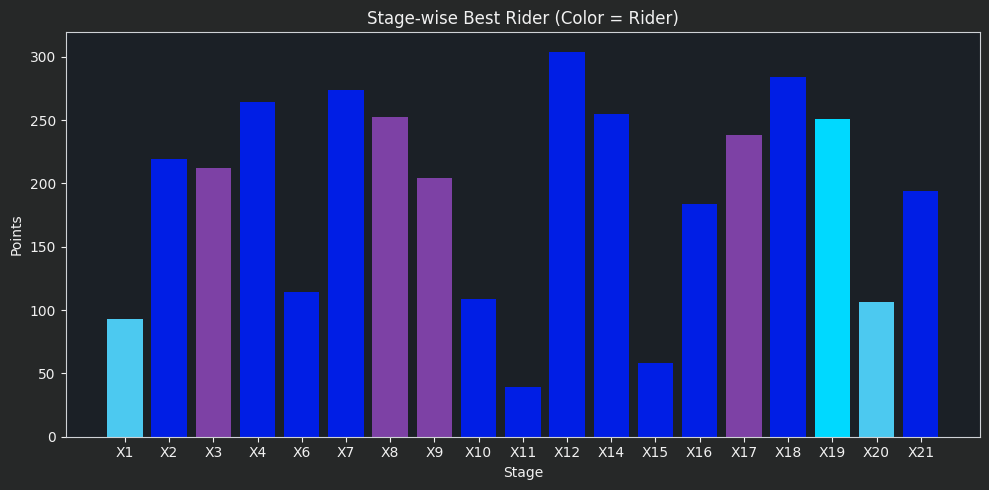

In [76]:
import matplotlib.pyplot as plt
df_stage_sorted = df_top.sort_values(
    ['stage_num', 'points'],
    ascending=[True, False]
)

stage_wise_best = (
    df_stage_sorted
    .drop_duplicates(subset='stage', keep='first')
    [['stage', 'stage_num', 'all_riders', 'points']]
    .sort_values('stage_num')
    .reset_index(drop=True)
)

print(stage_wise_best)
plt.rcParams.update({
    'figure.facecolor': "#262828",   # dark charcoal
    'axes.facecolor':   "#1b2026",
    'axes.edgecolor':   '#cfd2d6',
    'axes.labelcolor':  '#f1f1f1',
    'xtick.color':      '#f1f1f1',
    'ytick.color':      '#f1f1f1',
    'text.color':       '#f1f1f1',
})

# ---- slightly brighter / vibrant but not glossy ----
vibrant_colors = [
    '#4cc9f0',  # bright cyan
    "#001ee5",  # orange
    "#7d41a5",  # purple
    "#00d9ff",  # mint green
    '#f72585'   # pink-red
]

# map riders to colors
colors = {
    rider: color
    for rider, color in zip(
        stage_wise_best['all_riders'].unique(),
        vibrant_colors
    )
}

# ---- bar plot ----
plt.figure(figsize=(10, 5))
plt.bar(
    stage_wise_best['stage'],
    stage_wise_best['points'],
    color=[colors[r] for r in stage_wise_best['all_riders']]
)

plt.xlabel("Stage")
plt.ylabel("Points")
plt.title("Stage-wise Best Rider (Color = Rider)")

# remove grid completely
plt.grid(False)

plt.tight_layout()
plt.show()


all_riders
Tadej Pogačar       2789
Jonas Vingegaard    2218
Oscar Onley         1308
Jonathan Milan      1203
Matteo Jorgenson    1089
Name: cumulative_points, dtype: int64


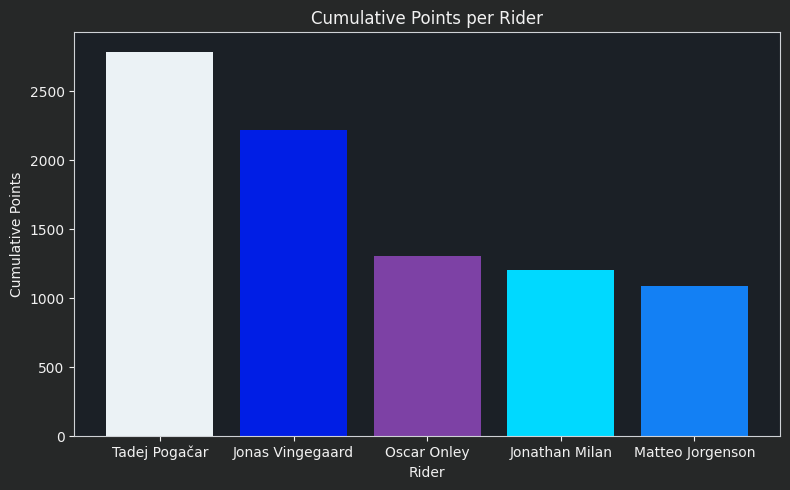

In [77]:


import matplotlib.pyplot as plt

plt.rcParams.update({
    'figure.facecolor': "#262828",  
    'axes.facecolor':   "#1b2026",
    'axes.edgecolor':   '#cfd2d6',
    'axes.labelcolor':  '#f1f1f1',
    'xtick.color':      '#f1f1f1',
    'ytick.color':      '#f1f1f1',
    'text.color':       '#f1f1f1',
})
df_use = df_top.copy()

df_use = df_use.sort_values(['all_riders', 'stage_num'])
df_use['cumulative_points'] = df_use.groupby('all_riders')['points'].cumsum()

final_cumulative = (
    df_use.groupby('all_riders')['cumulative_points']
          .max()
          .sort_values(ascending=False)
)

print(final_cumulative)

vibrant_colors = [
    "#ebf2f5",  # bright cyan
    '#001ee5',  # deep blue
    '#7d41a5',  # purple
    '#00d9ff',  # cyan-light
    "#1380f4"   # pink-red
]

colors = {
    rider: color
    for rider, color in zip(final_cumulative.index, vibrant_colors)
}

plt.figure(figsize=(8, 5))
plt.bar(
    final_cumulative.index,
    final_cumulative.values,
    color=[colors[r] for r in final_cumulative.index]
)

plt.xlabel("Rider")
plt.ylabel("Cumulative Points")
plt.title("Cumulative Points per Rider")

plt.grid(False)

plt.tight_layout()
plt.show()


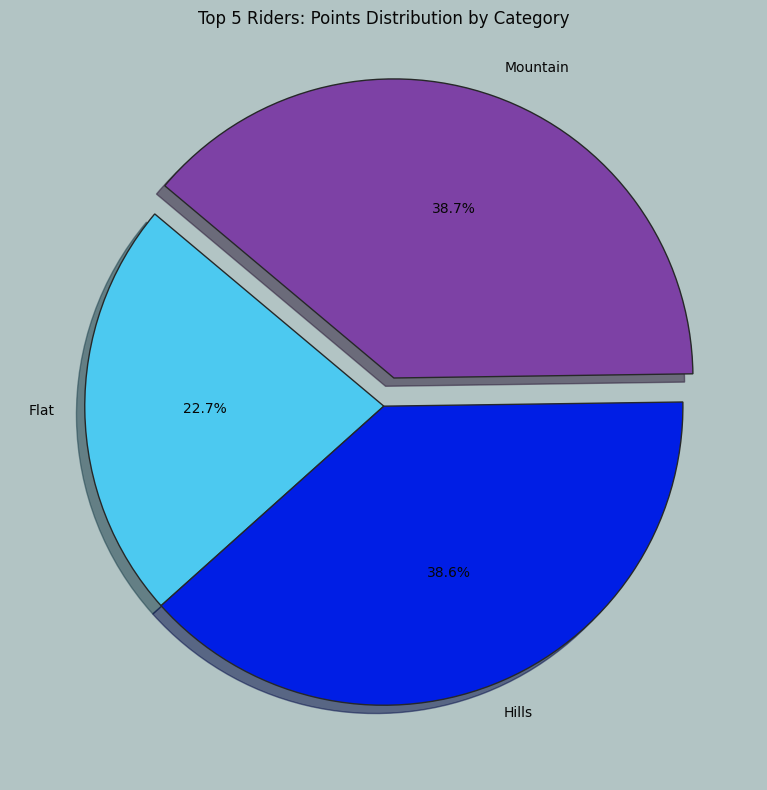

In [78]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'figure.facecolor': "#B2C4C4",
    'axes.facecolor':   "#FFFFFF",
    'axes.edgecolor':   '#cfd2d6',
    'axes.labelcolor':  '#f1f1f1',
    'text.color':       "#070707",
})

top5_riders = df_top.groupby('all_riders')['points'].sum().sort_values(ascending=False).head(5).index
df_top5 = df_top[df_top['all_riders'].isin(top5_riders)]

category_points = df_top5.groupby('stage_class')['points'].sum()

colors = ['#4cc9f0', '#001ee5', '#7d41a5']  
explode = [0.0, 0.0, 0.1]              

plt.figure(figsize=(8,8))
plt.pie(
    category_points,
    labels=["Flat","Hills","Mountain"],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    explode=explode,
    shadow=True,
    wedgeprops={'edgecolor': '#262828'}
)
plt.title("Top 5 Riders: Points Distribution by Category")
plt.tight_layout()
plt.show()
